# Resumo
Este projeto irá explorar brevemente os dados de um Hospital com possíveis pacientes diabéticos, assim sendo necessário criar modelos preditivos para auxiliar no diagnóstico dos futuros pacientes baseado no histórico dos pacientes já registrados 

 ![](https://blogpilates.com.br/wp-content/uploads/2020/04/pilates-para-diabetes-capa.jpg)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("diabetes.csv").iloc[:,1:]
df.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,32,1
3,89,66,23,94,28.1,0.167,21,0
4,137,40,35,168,43.1,2.288,33,1


## Traduzindo colunas

In [3]:
df.columns = ['Gestacao', 'Glicose', 'Pressao arterial',
       'Expessura da pele', 'Insulina', 'IMC', 'Idade', 'Tem diabetes?']

In [4]:
df.head()

,Gestacao,Glicose,Pressao arterial,Expessura da pele,Insulina,IMC,Idade,Tem diabetes?
0,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,32,1
3,89,66,23,94,28.1,0.167,21,0
4,137,40,35,168,43.1,2.288,33,1


## Informações adicionais

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gestacao           768 non-null    int64  
 1   Glicose            768 non-null    int64  
 2   Pressao arterial   768 non-null    int64  
 3   Expessura da pele  768 non-null    int64  
 4   Insulina           768 non-null    float64
 5   IMC                768 non-null    float64
 6   Idade              768 non-null    int64  
 7   Tem diabetes?      768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


## Verificando dados nulos

In [6]:
df.isnull().sum()

Gestacao             0
Glicose              0
Pressao arterial     0
Expessura da pele    0
Insulina             0
IMC                  0
Idade                0
Tem diabetes?        0
dtype: int64

***

## Distribuição das idades dos diagnosticados

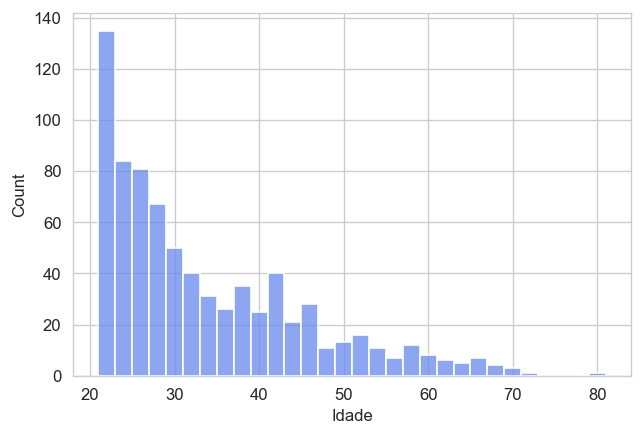

In [7]:
sns.set_style("whitegrid")
plt.figure(dpi=120)
sns.set_palette("coolwarm")
sns.histplot(data=df, x='Idade', bins=30)
plt.show()

Obs: Notamos que a maioria dos pacientes tem entre 22 e 30 anos


## Distribuição de pessoas com e sem diabetes

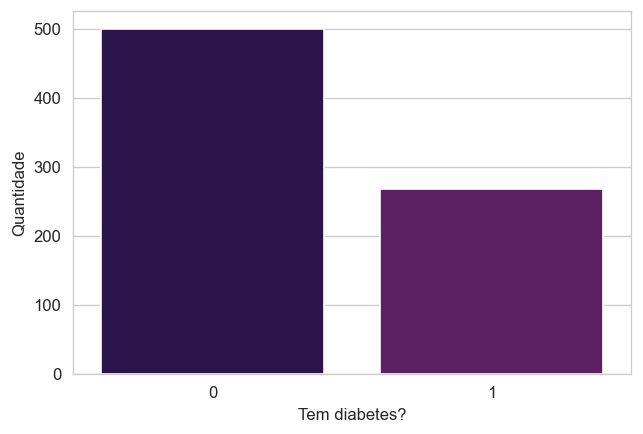

In [8]:
plt.figure(dpi=120)
sns.set_palette("inferno")
sns.countplot(x='Tem diabetes?', data=df)
plt.ylabel("Quantidade")
plt.show()

## Visualizando distribuição dos diagnosticados baseados em seu IMC e em sua glicose

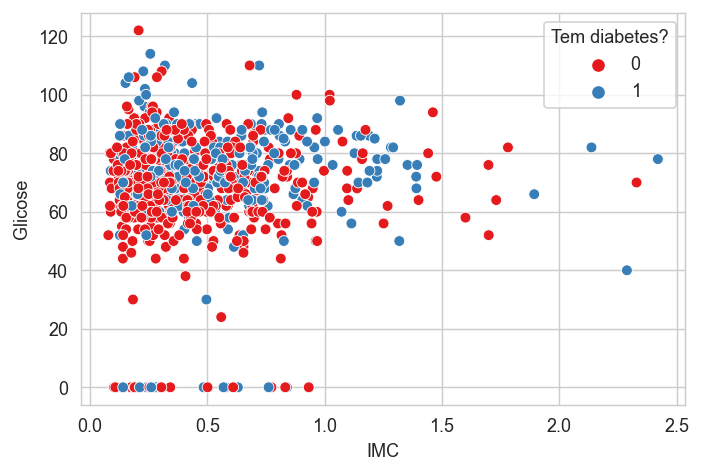

In [9]:
plt.figure(dpi=130)
sns.set_palette("Set1")
sns.scatterplot(y='Glicose', x='IMC', hue='Tem diabetes?', data=df)
plt.show()

Obs: É evidente que a maioria dos pacientes estão acima do peso, e os diagnosticados com diabetes são os que mais tem o percentual de glicose alto
***

## Distribuição da pressão arterial dos pacientes baseados em sua idade

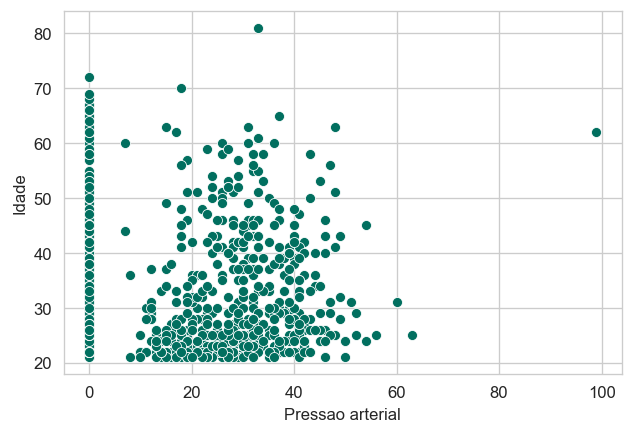

In [10]:
plt.figure(dpi=120)
sns.set_palette("PuBuGn_r")
sns.scatterplot(y='Idade', x='Pressao arterial', data=df)
plt.show()

Obs: Vemos que a idade nao tem uma correlação muito forte com a pressão arterial

***
## Agrupando média de glicose de quem tem e de quem nao tem diabetes

In [11]:
df[["Glicose","Tem diabetes?"]].groupby("Tem diabetes?").mean().sort_values(by="Glicose", ascending=False)

,Glicose
Tem diabetes?,
1,70.824627
0,68.184000


## Média de insulina de quem tem e de quem nao tem diabetes

In [12]:
df[["Insulina","Tem diabetes?"]].groupby("Tem diabetes?").mean().sort_values(by="Insulina", ascending=False)

,Insulina
Tem diabetes?,
1,35.142537
0,30.304200


## Média de idade das pessoas diagnosticadas

In [13]:
df[["Idade","Tem diabetes?"]].groupby("Tem diabetes?").mean().sort_values(by="Idade", ascending=False)

,Idade
Tem diabetes?,
1,37.067164
0,31.190000


## Expessura da pele dos diagnosticados

In [14]:
df[["Expessura da pele","Tem diabetes?"]].groupby("Tem diabetes?").mean().sort_values(by="Expessura da pele", ascending=False)

,Expessura da pele
Tem diabetes?,
1,100.335821
0,68.792000


## Pressão arterial dos diagnosticados

In [15]:
df[["Pressao arterial","Tem diabetes?"]].groupby("Tem diabetes?").mean().sort_values(by="Pressao arterial", ascending=False)

,Pressao arterial
Tem diabetes?,
1,22.164179
0,19.664000


## Índice de massa corporal(IMC) dos diagnosticados

In [16]:
df[["IMC","Tem diabetes?"]].groupby("Tem diabetes?").mean().sort_values(by="IMC", ascending=False)

,IMC
Tem diabetes?,
1,0.550500
0,0.429734


## Visualizando correlações entre as variáveis

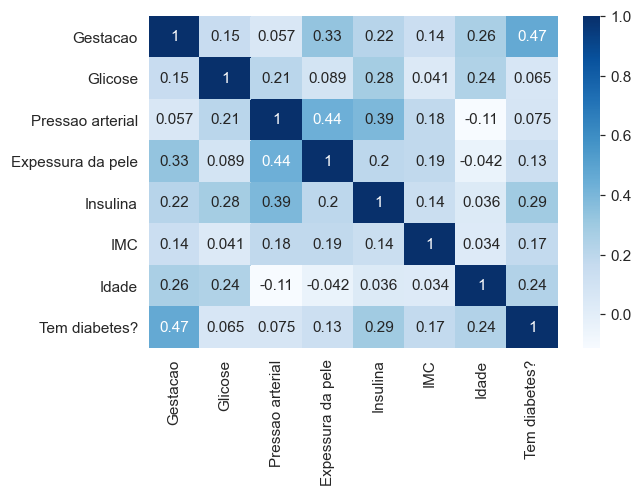

In [17]:
plt.figure(dpi=110)
sns.heatmap(df.corr(), annot=True, cmap="Blues")
plt.show()

***
# Preparando dados para início dos modelos
Modelos escolhidos: Adaboost, GradientBoosting, Random Forest, SVC e Logistic Regression

In [172]:
X = df.drop("Tem diabetes?", axis=1)
y = df['Tem diabetes?']

In [173]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, recall_score, f1_score, precision_score, accuracy_score

## Instanciando modelos

In [174]:
adamodel = AdaBoostClassifier()
gradmodel = GradientBoostingClassifier()
logmodel = LogisticRegression()
rfmodel = RandomForestClassifier()
svcmodel = SVC()
extmodel = ExtraTreesClassifier()

## Treinando Modelos

In [175]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.30, random_state=46)

In [176]:
adamodel.fit(Xtrain, ytrain)
gradmodel.fit(Xtrain, ytrain)
logmodel.fit(Xtrain, ytrain)
rfmodel.fit(Xtrain, ytrain)
svcmodel.fit(Xtrain, ytrain)
extmodel.fit(Xtrain, ytrain)

ExtraTreesClassifier()

## Armazenando predições

In [177]:
adapred = adamodel.predict(Xtest)
gradpred = gradmodel.predict(Xtest)
logpred = logmodel.predict(Xtest)
rfpred = rfmodel.predict(Xtest)
svcpred = svcmodel.predict(Xtest)
extpred = extmodel.predict(Xtest)

## Armazenando Métricas gerais(acurácia, revocação, precisão e F1-score)

In [178]:
scores = np.array([adapred, gradpred, logpred, rfpred, svcpred, extpred])
precision = []
recall = []
f1 = []
accuracy = []
for i in scores:
    accuracy.append(accuracy_score(ytest, i)*100)
    precision.append(precision_score(ytest, i)*100)
    recall.append(recall_score(ytest, i)*100)
    f1.append(f1_score(ytest, i)*100)

In [212]:
modelos = "Adaboost GradientBoosting LogisticRegression RandomForest SVC ExtraTree".split()
metricasGerais = pd.DataFrame({
        "Modelo":modelos,
        "Acurácia":accuracy,
        "Precisão":precision,
        "Revocação":recall,
        "F1":f1
             }).sort_values(by="Revocação",ascending=False)


## Exibindo ranking de modelos

In [213]:
metricasGerais

,Modelo,Acurácia,Precisão,Revocação,F1
1,GradientBoosting,74.458874,61.538462,70.00,65.497076
3,RandomForest,73.593074,60.674157,67.50,63.905325
0,Adaboost,70.129870,56.179775,62.50,59.171598
2,LogisticRegression,77.056277,68.493151,62.50,65.359477
5,ExtraTree,74.891775,64.473684,61.25,62.820513
4,SVC,77.922078,74.576271,55.00,63.309353


Obs:Neste caso, **priorizando a revocação**, Gradient Boosting obteve o melhor resultado

## Melhorando performance do modelo com melhor desempenho

In [26]:
from sklearn.model_selection import GridSearchCV

### Selecionando parametros

In [29]:
params = {
    'n_estimators':[100,200,300,400,500],
    'min_samples_leaf':[1,2,3],
    'max_depth':[1,2,3]
}

In [180]:
grid = GridSearchCV(GradientBoostingClassifier(random_state=46), param_grid=params)

### Executando treino do modelo escolhido com todos os parametros

In [181]:
grid.fit(X, y)

GridSearchCV(estimator=GradientBoostingClassifier(random_state=46),
             param_grid={'max_depth': [1, 2, 3], 'min_samples_leaf': [1, 2, 3],
                         'n_estimators': [100, 200, 300, 400, 500]})

### Melhores parametros encontrados durante o treino

In [182]:
grid.best_params_

{'max_depth': 3, 'min_samples_leaf': 3, 'n_estimators': 100}

### Armazenando as novas predições

In [190]:
gridpred = grid.predict(Xtest)


### Passando o novo resultado das métricas para um novo dataframe

In [219]:
modeloFinal = pd.DataFrame({
    "Modelo melhorado":"Gradient Boosting",
    "Acurácia":[accuracy_score(ytest, gridpred)*100],
    "Precisão":[precision_score(ytest, gridpred)*100],
    "Revocacão":[recall_score(ytest, gridpred)*100],
    "F1":[f1_score(ytest, gridpred)*100]
})

## Modelo antes do Tuning

In [216]:
metricasGerais[metricasGerais["Modelo"] == "GradientBoosting"]

,Modelo,Acurácia,Precisão,Revocação,F1
1,GradientBoosting,74.458874,61.538462,70.0,65.497076


## Modelo após Tuning

In [220]:
modeloFinal

,Modelo melhorado,Acurácia,Precisão,Revocacão,F1
0,Gradient Boosting,88.311688,81.927711,85.0,83.435583


# Conclusão
Apesar do modelo SVC ter apresentado uma melhor acurácia e precisão, por se tratar de uma classificação de doença, a prioridade é minimizar ao máximo os falsos negativos(ter a doença, e nao acusar), e o modelo Gradient Boosting obteve o melhor score de revocação, sendo a melhor opção para este caso